<img src='1.png'>

In [66]:
from decimal import getcontext
getcontext().prec = 7

In [35]:
import numpy as np
def np_gaussElimin(A,B):
    n = len(B)
    a_b = np.asarray(np.column_stack((A,B)))
    for i in range(0,n-1):
        for k in range(i,n-1):
            lam = a_b[k+1,i] / a_b[i,i]
#             print('lam {}'.format(lam))
            a_b[k+1,:] = a_b[k+1,:] -lam * a_b[i,:]
#     print(a_b)
    b = a_b[:,-1]
    a = a_b[:,0:-1]

    for k in range(n-1,-1,-1): # back solving
        try : 
            b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
        except ZeroDivisionError as zero : 
            print('det A = 0')
    return a , b
    print('b = {}'.format(b))

In [52]:
a = np.mat([[3.0,1.0,-1.0],[2.0,4.0,1.0],[-1.0,2.0,5.0]])
b = np.array([4,1,1])

In [53]:
np_gaussElimin(a,b)

(array([[ 3.        ,  1.        , -1.        ],
        [ 0.        ,  3.33333333,  1.66666667],
        [ 0.        ,  0.        ,  3.5       ]]), array([ 2., -1.,  1.]))

In [1]:
'''
Jacobi and Gauss Seidel 3d
'''
def u_need_vw(v,w):
    return ((4.0 - v + w)/3)
def v_need_uw(u,w):
    '''
    u -> +1
    w -> 0 
    '''
    return ((1-2*u-w)/4.0)
def w_need_uv(u,v):
    '''
    u -> +1 
    v -> +1
    '''
    return ((1+u-2*v)/5)

In [19]:
'''
SOR
'''
def u_need_uvw(u,v,w,omega):
    '''
    output -> +1
    input -> 0
    '''
    return (1.0-omega)*u+omega*((4-v+w)/3.0)
def v_need_vuw(v,u,w,omega):
    '''
    output -> +1
    input -> u +1 ,else 0
    '''
    return (1.0-omega)*v+omega*(1-2*u-w)/4.0
def w_need_wuv(w,u,v,omega):
    '''
    only w -> 0 ,else +1
    '''
    return (1-omega)*w+omega*(1+u-2*v)/5.0

In [49]:
def Jacobi():
    p = (0,0,0) # v ,w need
    while True :
        u = u_need_vw(p[1],p[2])
        v = v_need_uw(p[0],p[2])
        w = w_need_uv(p[0],p[1])
        p = (u,v,w)
        yield u,v,w
        
tol = 1e-50
for i , r in enumerate(Jacobi()):
    if i > 2 :
        if (np.abs((y[0] - r[0])) < tol and np.abs((y[1] - r[1])) < tol and np.abs((y[2] - r[2])) < tol ) or i >= 100 :
            print(i,r)
            break
    y = r

94 (2.0, -1.0, 1.0)


In [50]:
def Gauss_Seidel_3d():
    p = (0,0) # v ,w need
    while True :
        u = u_need_vw(p[0],p[1])
        v = v_need_uw(u,p[1])
        w = w_need_uv(u,v)
        p = (v,w)
        yield u,v,w
        
tol = 1e-50
for i , r in enumerate(Gauss_Seidel_3d()):
    if i > 2 :
        if (np.abs((y[0] - r[0])) < tol and np.abs((y[1] - r[1])) < tol and np.abs((y[2] - r[2])) < tol ) or i >= 100 :
            print(i,r)
            break
    y = r

45 (2.0, -1.0, 1.0)


In [57]:
def SOR(omega = 1.25):
    p = (0,0,0)
    while True :
        u = u_need_uvw(p[0],p[1],p[2],omega)
        v = v_need_vuw(p[1],u,p[2],omega)
        w = w_need_wuv(p[2],u,v,omega)
        p = (u,v,w)
        yield (u,v,w)

tol = 1e-50
for i , r in enumerate(SOR()):
    if i > 2 :
        if (np.abs((y[0] - r[0])) < tol and np.abs((y[1] - r[1])) < tol and np.abs((y[2] - r[2])) < tol ) or i >= 100 :
            print(i,r)
            break
    y = r

27 (2.0, -1.0, 1.0)


收斂的速度  

- 1 . SOR
- 2 . Gauss-Seidel
- 3 . Jacobi 

In [101]:
tol = 1e-50
o , p = [] , [] 

for _ in np.arange(1,5,0.01):
    for i , r in enumerate(SOR(omega = _)):
        if i > 2 :
            if (np.abs((y[0] - r[0])) < tol and np.abs((y[1] - r[1])) < tol and np.abs((y[2] - r[2])) < tol ) or i >= 100 :
                print('i = {0:1d} , omega = {1:6.3f}'.format(i,_))
                o.append(i)
                p.append(_)
                break
    y = r

i = 100 , omega =  1.000
i = 100 , omega =  1.010
i = 39 , omega =  1.020
i = 100 , omega =  1.030
i = 100 , omega =  1.040
i = 100 , omega =  1.050
i = 100 , omega =  1.060
i = 100 , omega =  1.070
i = 34 , omega =  1.080
i = 100 , omega =  1.090
i = 100 , omega =  1.100
i = 28 , omega =  1.110
i = 27 , omega =  1.120
i = 24 , omega =  1.130
i = 21 , omega =  1.140
i = 19 , omega =  1.150
i = 20 , omega =  1.160
i = 22 , omega =  1.170
i = 22 , omega =  1.180
i = 23 , omega =  1.190
i = 23 , omega =  1.200
i = 23 , omega =  1.210
i = 24 , omega =  1.220
i = 25 , omega =  1.230
i = 25 , omega =  1.240
i = 26 , omega =  1.250
i = 27 , omega =  1.260
i = 28 , omega =  1.270
i = 29 , omega =  1.280
i = 29 , omega =  1.290
i = 31 , omega =  1.300
i = 31 , omega =  1.310
i = 32 , omega =  1.320
i = 33 , omega =  1.330
i = 34 , omega =  1.340
i = 36 , omega =  1.350
i = 37 , omega =  1.360
i = 37 , omega =  1.370
i = 39 , omega =  1.380
i = 42 , omega =  1.390
i = 40 , omega =  1.400
i = 42 

Homework 隨意建立矩陣 , 測試上面的演算法

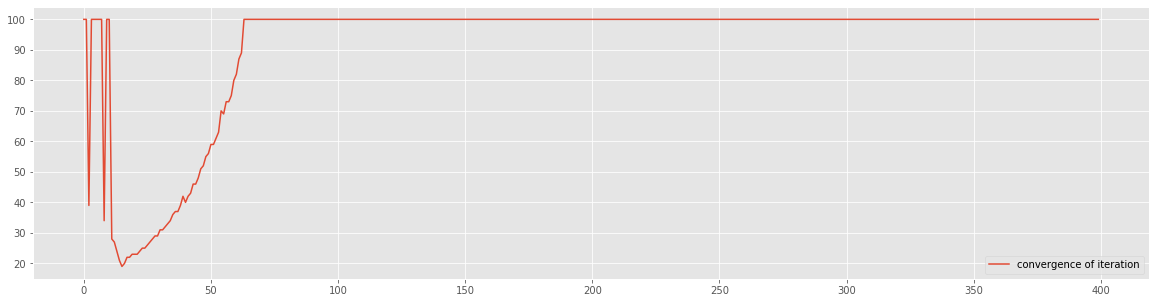

In [114]:
'''
隨著 omega 的變化 ， 收斂的變化
'''

x = range(0,len(np.arange(1,5,0.01)))
import matplotlib.pyplot as pt
from matplotlib import style
style.use('ggplot')
pt.figure(figsize=(20,5))
pt.plot(x,o,label = 'convergence of iteration')
# px = pt.twinx()
# px.plot(x,p,'b--',label = 'omega')
pt.legend()
pt.show()